In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import xgboost as xgb
import json
import numpy as np

In [13]:
X = None
y = None
start = True
fixed_size = 250
max_length = 0

with open("../data/domain1_train.json") as f:
    for line in f:
        data = json.loads(line)
        if start:
            elements_to_add = fixed_size - len(data["text"])
            X = np.array([np.pad(data["text"], (0, elements_to_add), 'constant')])
            y = np.array(data["label"])
            start = False
        else:
            # X = np.append(X, [data["text"]], axis=0)
            elements_to_add = fixed_size - len(data["text"])
            X = np.append(X, [np.pad(data["text"], (0, elements_to_add), 'constant')], axis=0)
            y = np.append(y, data["label"])
        if max_length < len(data["text"]):
            max_length = len(data["text"])

print(f"Max length: {max_length}")

Max length: 238


In [27]:
from xgboost import XGBClassifier
# read data
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [28]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)
# create model instance
bst = XGBClassifier(n_estimators=2, max_depth=2, learning_rate=1, objective='binary:logistic')
# fit model
bst.fit(X_train, y_train)
# make predictions
preds = bst.predict(X_test)

In [31]:
print(preds)
print(y_test)

[1 0 0 ... 1 1 0]
[0 0 1 ... 1 1 0]


In [33]:
from sklearn.model_selection import cross_val_score

cross_val_score(bst, X, y, cv=10)

array([0.68153846, 0.66717949, 0.68358974, 0.66717949, 0.6825641 ,
       0.68205128, 0.68      , 0.66923077, 0.66717949, 0.67076923])

In [34]:
scores = []
for i in range(2, 37, 5):
    bst = XGBClassifier(n_estimators=2, max_depth=i, learning_rate=1, objective='binary:logistic')
    score = sum(cross_val_score(bst, X, y, cv=10))/10
    scores.append(score)

print(scores)

[0.675128205128205, 0.7991282051282051, 0.8278461538461537, 0.8266666666666668, 0.8254871794871794, 0.8233333333333333, 0.8238461538461538]


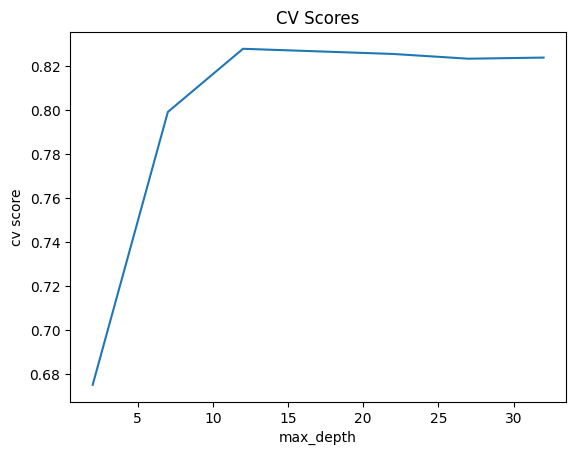

In [35]:
import matplotlib.pyplot as plt

# plotting the points 
plt.plot(range(2, 37, 5), scores)
  
# naming the x axis
plt.xlabel('max_depth')
# naming the y axis
plt.ylabel('cv score')
  
# giving a title to my graph
plt.title('CV Scores')
  
# function to show the plot
plt.show()